In [43]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables (for label encoding)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# File system management
# for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc
import os

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt

# seaborn is a library for making statistical graphics in Python
import seaborn as sns

In [44]:
## Read in Data

# Training data features
ab_train = pd.read_csv('train.csv')
print('Training data shape: ', ab_train.shape)
ab_train.head()

Training data shape:  (7471, 22)


,id,Decision,Host_response_time,Host_is_superhost,Host_has_profile_pic,Host_identity_verified,Neighbourhood,Property_type,Room_type,Accommodates,...,Beds,Essentials,Cooking,Balcony,Parking,Price,Number_of_reviews,Review_scores_rating,Instant_bookable,Month
0,1,1,within an hour,t,t,t,28806,Entire cabin,Entire home/apt,6,...,3.0,5,5,1,1,$164.00,90,4.93,t,August
1,2,1,within an hour,t,t,t,28804,Entire house,Entire home/apt,4,...,1.0,5,4,1,1,$101.00,522,4.69,t,June
2,3,0,within a few hours,t,t,t,28806,Private room in bungalow,Private room,1,...,1.0,5,3,1,1,$32.00,35,4.83,f,June
3,4,1,within an hour,t,t,t,28803,Entire condominium (condo),Entire home/apt,8,...,5.0,5,5,0,1,$381.00,11,5.00,t,September
4,5,0,within an hour,t,t,t,28805,Entire house,Entire home/apt,6,...,4.0,5,5,1,1,$238.00,63,4.70,f,July


In [45]:
# Testing data features

ab_test = pd.read_csv('test.csv')
print('Testing data shape: ', ab_test.shape)
ab_test.head()

Testing data shape:  (2440, 21)


,id,Host_response_time,Host_is_superhost,Host_has_profile_pic,Host_identity_verified,Neighbourhood,Property_type,Room_type,Accommodates,Bathrooms_text,...,Beds,Essentials,Cooking,Balcony,Parking,Price,Number_of_reviews,Review_scores_rating,Instant_bookable,Month
0,1,NaN,t,t,t,28806,Private room in bungalow,Private room,1,1 private bath,...,1.0,4,3,1,1,$58.00,137,4.85,f,September
1,2,within an hour,t,t,t,28805,Entire apartment,Entire home/apt,2,1 bath,...,1.0,5,5,1,1,$76.00,573,4.93,t,June
2,3,within an hour,t,t,t,28805,Entire rental unit,Entire home/apt,2,1 bath,...,1.0,5,5,1,1,$76.00,590,4.93,t,August
3,4,within an hour,t,t,t,28805,Entire rental unit,Entire home/apt,2,1 bath,...,1.0,5,5,1,1,$76.00,600,4.93,t,September
4,5,within an hour,t,t,t,28805,Entire apartment,Entire home/apt,2,1 bath,...,1.0,5,5,1,1,$76.00,581,4.93,t,July


In [46]:
## Examine the distribution of the Decision Column

ab_train['Decision'].value_counts()

1    4735
0    2736
Name: Decision, dtype: int64

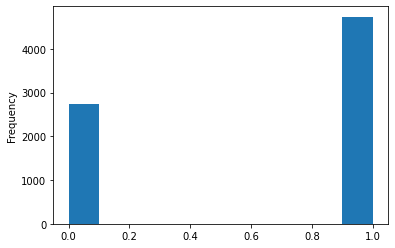

In [47]:
ab_train['Decision'].astype(int).plot.hist();

# Save the histogram
plt.savefig('hist_Decision.png')

In [48]:
## Examine Missing Values

# Function to calculate missing values by column # Func
def missing_values_table(df):
    
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values', 1:'% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
               "There are " + str(mis_val_table_ren_columns.shape[0]) +
               " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [49]:
# Missing values statistics
missing_values = missing_values_table(ab_train)
missing_values.head(20)

Your selected dataframe has 22 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Host_response_time,858,11.5
Bedrooms,585,7.8
Review_scores_rating,395,5.3
Host_is_superhost,96,1.3
Host_has_profile_pic,96,1.3
Host_identity_verified,96,1.3
Beds,13,0.2


In [50]:
## Column Types

# Number of each type of column
#ab_train.dtypes
ab_train.dtypes.value_counts()

object     10
int64       9
float64     3
dtype: int64

In [51]:
# Number of unique classes (object = categorical) in each object column
ab_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Host_response_time          4
Host_is_superhost           2
Host_has_profile_pic        2
Host_identity_verified      2
Property_type              55
Room_type                   4
Bathrooms_text             23
Price                     598
Instant_bookable            2
Month                       4
dtype: int64

In [52]:
# Cleaning up Price's currency data with pandas
ab_train['Price'] = ab_train['Price'].replace({'\$':'',',':''},regex=True).astype('float')
ab_test['Price'] = ab_test['Price'].replace({'\$':'',',':''},regex=True).astype('float')
#ab_train['Price'].head(20)

In [53]:
## Encoding Categorical Vairables

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in ab_train:
    if ab_train[col].dtype == 'object':
        unique_list = list(ab_train[col].unique())
        unique_list = [x for x in unique_list if pd.isnull(x)==False]
        # If 2 or fewer unique categories
        if len(unique_list) <= 2:
            # Train on the training data
            le.fit(ab_train[col])
            # Transform both training and testing data
            ab_train[col] = le.transform(ab_train[col])
            ab_test[col] = le.transform(ab_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            print(col)
print('%d columns were label encoded.' % le_count)


Host_is_superhost
Host_has_profile_pic
Host_identity_verified
Instant_bookable
4 columns were label encoded.


In [54]:
# one-hot encoding of categorical variables

ab_train = pd.get_dummies(ab_train)
ab_test = pd.get_dummies(ab_test)

print('Training Features shape: ', ab_train.shape)
print('Testing Features shape: ', ab_test.shape)

ab_train.fillna(ab_train.mean(), inplace = True)
ab_test.fillna(ab_test.mean(), inplace = True)
'''
# retrieve the numpy array
train_values = ab_train.values
test_values = ab_test.values

# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')

# transform the dataset
transformed_train_values = imputer.fit_transform(train_values)
transformed_test_values = imputer.fit_transform(test_values)

'''

Training Features shape:  (7471, 107)
Testing Features shape:  (2440, 89)


"\n# retrieve the numpy array\ntrain_values = ab_train.values\ntest_values = ab_test.values\n\n# define the imputer\nimputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')\n\n# transform the dataset\ntransformed_train_values = imputer.fit_transform(train_values)\ntransformed_test_values = imputer.fit_transform(test_values)\n\n"

In [55]:
## Aligining Training and Testing Data

train_labels = ab_train['Decision']

# Align the training and testing data, keep only columns present in both dataframes
ab_train, ab_test = ab_train.align(ab_test, join = 'inner', axis = 1)

# Add the target back in
ab_train['Decision'] = train_labels

print('Training Features shape: ', ab_train.shape)
print('Testing Features shape: ', ab_test.shape)

Training Features shape:  (7471, 86)
Testing Features shape:  (2440, 85)


In [56]:
## Corelation

# Find correlations with the target and sort
correlations = ab_train.corr()['Decision'].sort_values()

# Disply correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

ab_train_par = ab_train[['Bathrooms_text_1 private bath','Property_type_Entire condominium','Host_identity_verified','Host_is_superhost','Room_type_Hotel room','Price','Property_type_Room in bed and breakfast','Property_type_Private room in bed and breakfast','Number_of_reviews','Property_type_Entire condominium (condo)','Month_August','Accommodates','Instant_bookable','Host_response_time_within an hour','Host_response_time_within an hour','Host_response_time_within a day','Host_response_time_within a few hours','Property_type_Entire bungalow','Essentials','Property_type_Entire house','Month_July','Host_response_time_a few days or more','Month_June','Parking','Property_type_Entire guesthouse','Bathrooms_text_1.5 baths','Property_type_Entire cottage','Room_type_Entire home/apt']]
ab_test_par = ab_test[['Bathrooms_text_1 private bath','Property_type_Entire condominium','Host_identity_verified','Host_is_superhost','Room_type_Hotel room','Price','Property_type_Room in bed and breakfast','Property_type_Private room in bed and breakfast','Number_of_reviews','Property_type_Entire condominium (condo)','Month_August','Accommodates','Instant_bookable','Host_response_time_within an hour','Host_response_time_within an hour','Host_response_time_within a day','Host_response_time_within a few hours','Property_type_Entire bungalow','Essentials','Property_type_Entire house','Month_July','Host_response_time_a few days or more','Month_June','Parking','Property_type_Entire guesthouse','Bathrooms_text_1.5 baths','Property_type_Entire cottage','Room_type_Entire home/apt']]
'''
The most significant correlations

Positive Correlations:
Host_response_time_within an hour
Instant_bookable

Negative Correlations:
Host_response_time_within a day
Host_response_time_within a few hours
'''

Most Positive Correlations:
 Bathrooms_text_1 private bath                      0.044426
Property_type_Entire condominium                   0.047957
Host_identity_verified                             0.050590
Host_is_superhost                                  0.051808
Room_type_Hotel room                               0.053949
Price                                              0.059403
Property_type_Room in bed and breakfast            0.059617
Property_type_Private room in bed and breakfast    0.065167
Number_of_reviews                                  0.066657
Property_type_Entire condominium (condo)           0.067271
Month_August                                       0.070062
Accommodates                                       0.079489
Instant_bookable                                   0.218592
Host_response_time_within an hour                  0.276863
Decision                                           1.000000
Name: Decision, dtype: float64

Most Negative Correlations:
 Host_respo

'\nThe most significant correlations\n\nPositive Correlations:\nHost_response_time_within an hour\nInstant_bookable\n\nNegative Correlations:\nHost_response_time_within a day\nHost_response_time_within a few hours\n'

In [57]:
'''
plt.figure(figsize = (10,8))

# KDE plot of not booking airbnb depending on Host_response_time_within an hour
sns.kdeplot(ab_train.loc[ab_train['Decision'] == 0, 'Host_response_time_within an hour'], label='Decision == 0')

# KDE plot of booking airbnb depending on Host_response_time_within an hour
sns.kdeplot(ab_train.loc[ab_train['Decision'] == 1, 'Host_response_time_within an hour'], label='Decision == 1')
plt.legend()
'''

"\nplt.figure(figsize = (10,8))\n\n# KDE plot of not booking airbnb depending on Host_response_time_within an hour\nsns.kdeplot(ab_train.loc[ab_train['Decision'] == 0, 'Host_response_time_within an hour'], label='Decision == 0')\n\n# KDE plot of booking airbnb depending on Host_response_time_within an hour\nsns.kdeplot(ab_train.loc[ab_train['Decision'] == 1, 'Host_response_time_within an hour'], label='Decision == 1')\nplt.legend()\n"

In [85]:
%%time
## Fitting the Model, Evaluating Result, and Visualizing Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Imputing missing values for sklearn decision tree

# retrieve the numpy array
train_values = ab_train_par.values
test_values = ab_test_par.values

#degine the imputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_train_values = imp.fit_transform(train_values)
transformed_test_values = imp.fit_transform(test_values)

# Set up the train data with columns that are in use

#X = ab_train.drop(['Decision','id'], axis=1)
X = ab_train_par
y = ab_train['Decision']
# creating a list of column names by calling the .columns
#list_of_column_names_train = list(ab_train.columns)
#list_of_column_names_train.remove('Decision')
#list_of_column_names_train.remove('id')
#print('List of train column names : ', list_of_column_names_train)
#X_train, X_test, y_train, y_test = train_test_split(ab_train[ab_train.columns], ab_train['Decision'], test_size = 0.2, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

clf_en = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

Wall time: 34.9 ms


Model accuracy score with criterion entropy: 0.7286


[Text(334.8, 380.52, 'X[13] <= 0.5\ngini = 0.466\nsamples = 6723\nvalue = [2480, 4243]'),
 Text(167.4, 271.8, 'X[5] <= 86.5\ngini = 0.473\nsamples = 1500\nvalue = [925, 575]'),
 Text(83.7, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.346\nsamples = 449\nvalue = [349, 100]'),
 Text(41.85, 54.360000000000014, 'gini = 0.274\nsamples = 384\nvalue = [321, 63]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.49\nsamples = 65\nvalue = [28, 37]'),
 Text(251.10000000000002, 163.07999999999998, 'X[12] <= 0.5\ngini = 0.495\nsamples = 1051\nvalue = [576, 475]'),
 Text(209.25, 54.360000000000014, 'gini = 0.466\nsamples = 632\nvalue = [399, 233]'),
 Text(292.95, 54.360000000000014, 'gini = 0.488\nsamples = 419\nvalue = [177, 242]'),
 Text(502.20000000000005, 271.8, 'X[12] <= 0.5\ngini = 0.418\nsamples = 5223\nvalue = [1555, 3668]'),
 Text(418.5, 163.07999999999998, 'X[8] <= 3.5\ngini = 0.474\nsamples = 1782\nvalue = [686, 1096]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.379\n

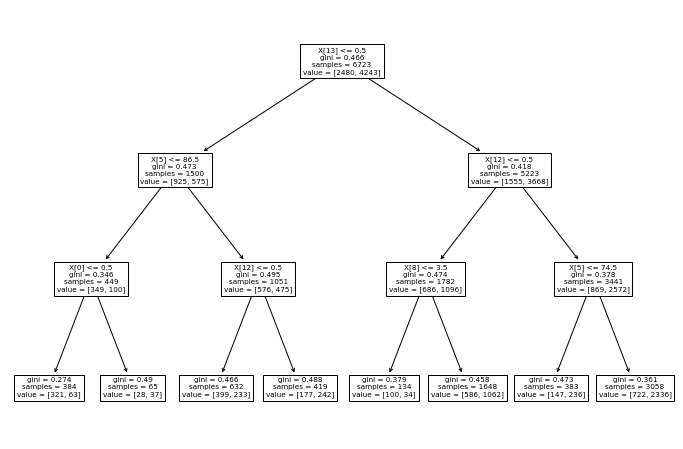

In [86]:
## evaluate the classifier
# confusion matrix of the classifier

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [62]:
## predict classification with test data

#X_test_test = ab_test.drop(['id'], axis=1)
X_test_test = ab_test_par
test_pre = clf_en.predict(X_test_test)

id = ab_test['id'].values.tolist()
df = pd.DataFrame({'id':id,'Decision':test_pre})
print(df)

df.to_csv('result_DT.csv', index = False)

        id  Decision
0        1         1
1        2         1
2        3         1
3        4         1
4        5         1
...    ...       ...
2435  2436         1
2436  2437         1
2437  2438         1
2438  2439         1
2439  2440         1

[2440 rows x 2 columns]


In [ ]:
0.34016


Host_is_superhost
Host_has_profile_pic
Host_identity_verified
Instant_bookable
4 columns were label encoded.
Training Features shape:  (7471, 107)
Testing Features shape:  (2440, 89)
Most Positive Correlations:
 Bathrooms_text_1 private bath                      0.044426
Property_type_Entire condominium                   0.047957
Host_identity_verified                             0.050590
Host_is_superhost                                  0.051808
Room_type_Hotel room                               0.053949
Price                                              0.059403
Property_type_Room in bed and breakfast            0.059617
Property_type_Private room in bed and breakfast    0.065167
Number_of_reviews                                  0.066657
Property_type_Entire condominium (condo)           0.067271
Month_August                                       0.070062
Accommodates                                       0.079489
Instant_bookable                                   0.218592
Host_res

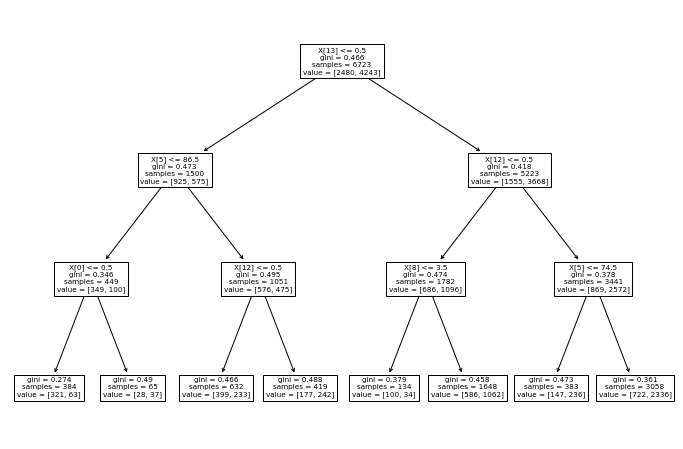

In [91]:
%%time
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables (for label encoding)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# File system management
# for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc
import os

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt

# seaborn is a library for making statistical graphics in Python
import seaborn as sns

## Read in Data

# Training data features
ab_train = pd.read_csv('train.csv')

# Testing data features
ab_test = pd.read_csv('test.csv')

# Cleaning up Price's currency data with pandas
ab_train['Price'] = ab_train['Price'].replace({'\$':'',',':''},regex=True).astype('float')
ab_test['Price'] = ab_test['Price'].replace({'\$':'',',':''},regex=True).astype('float')


## Encoding Categorical Vairables

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in ab_train:
    if ab_train[col].dtype == 'object':
        unique_list = list(ab_train[col].unique())
        unique_list = [x for x in unique_list if pd.isnull(x)==False]
        # If 2 or fewer unique categories
        if len(unique_list) <= 2:
            # Train on the training data
            le.fit(ab_train[col])
            # Transform both training and testing data
            ab_train[col] = le.transform(ab_train[col])
            ab_test[col] = le.transform(ab_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            print(col)
print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables

ab_train = pd.get_dummies(ab_train)
ab_test = pd.get_dummies(ab_test)

print('Training Features shape: ', ab_train.shape)
print('Testing Features shape: ', ab_test.shape)

ab_train.fillna(ab_train.mean(), inplace = True)
ab_test.fillna(ab_test.mean(), inplace = True)

## Aligining Training and Testing Data

train_labels = ab_train['Decision']

# Align the training and testing data, keep only columns present in both dataframes
ab_train, ab_test = ab_train.align(ab_test, join = 'inner', axis = 1)

# Add the target back in
ab_train['Decision'] = train_labels

## Corelation

# Find correlations with the target and sort
correlations = ab_train.corr()['Decision'].sort_values()

# Disply correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

ab_train_par = ab_train[['Bathrooms_text_1 private bath','Property_type_Entire condominium','Host_identity_verified','Host_is_superhost','Room_type_Hotel room','Price','Property_type_Room in bed and breakfast','Property_type_Private room in bed and breakfast','Number_of_reviews','Property_type_Entire condominium (condo)','Month_August','Accommodates','Instant_bookable','Host_response_time_within an hour','Host_response_time_within an hour','Host_response_time_within a day','Host_response_time_within a few hours','Property_type_Entire bungalow','Essentials','Property_type_Entire house','Month_July','Host_response_time_a few days or more','Month_June','Parking','Property_type_Entire guesthouse','Bathrooms_text_1.5 baths','Property_type_Entire cottage','Room_type_Entire home/apt']]
ab_test_par = ab_test[['Bathrooms_text_1 private bath','Property_type_Entire condominium','Host_identity_verified','Host_is_superhost','Room_type_Hotel room','Price','Property_type_Room in bed and breakfast','Property_type_Private room in bed and breakfast','Number_of_reviews','Property_type_Entire condominium (condo)','Month_August','Accommodates','Instant_bookable','Host_response_time_within an hour','Host_response_time_within an hour','Host_response_time_within a day','Host_response_time_within a few hours','Property_type_Entire bungalow','Essentials','Property_type_Entire house','Month_July','Host_response_time_a few days or more','Month_June','Parking','Property_type_Entire guesthouse','Bathrooms_text_1.5 baths','Property_type_Entire cottage','Room_type_Entire home/apt']]


## Fitting the Model, Evaluating Result, and Visualizing Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Imputing missing values for sklearn decision tree

# retrieve the numpy array
train_values = ab_train_par.values
test_values = ab_test_par.values

#degine the imputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_train_values = imp.fit_transform(train_values)
transformed_test_values = imp.fit_transform(test_values)

# Set up the train data with columns that are in use
X = ab_train_par
y = ab_train['Decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

clf_en = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

## evaluate the classifier
# confusion matrix of the classifier

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))
plt.savefig('tree.png',bbox_inches = "tight")

## predict classification with test data

#X_test_test = ab_test.drop(['id'], axis=1)
X_test_test = ab_test_par
test_pre = clf_en.predict(X_test_test)

id = ab_test['id'].values.tolist()
df = pd.DataFrame({'id':id,'Decision':test_pre})
print(df)

#df.to_csv('result_DT.csv', index = False)